In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

## Q1

1.1 Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

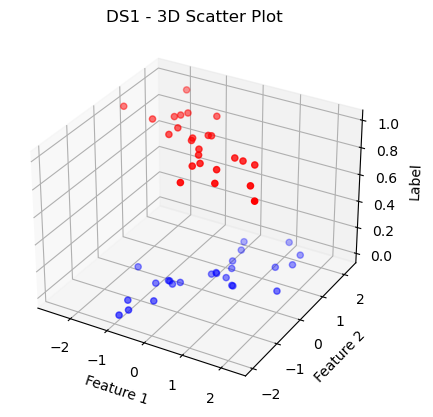

In [2]:
# Create a synthetic dataset 
np.random.seed(0)
X = np.random.randn(50, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR operation to create non-linearly separable classes 

# Create a DataFrame containing features and labels
df1 = pd.DataFrame(np.concatenate((X, y.reshape(-1, 1)), axis=1), columns=['feature1', 'feature2', 'label'])

# Save the dataset as a CSV file
df1.to_csv('DS1.csv', index=False)

from mpl_toolkits.mplot3d import Axes3D

# Create a synthetic dataset
np.random.seed(0)
X = np.random.randn(50, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR operation to create non-linearly separable classes

# Create a DataFrame containing features and labels
df1 = pd.DataFrame(np.concatenate((X, y.reshape(-1, 1)), axis=1), columns=['feature1', 'feature2', 'label'])

# Plot the dataset in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['feature1'], df1['feature2'], df1['label'], c=df1['label'], cmap='bwr')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label')
ax.set_title('DS1 - 3D Scatter Plot')
plt.show()
# Plot the dataset （2D）
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('DS1')
#plt.show()

1.2 Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

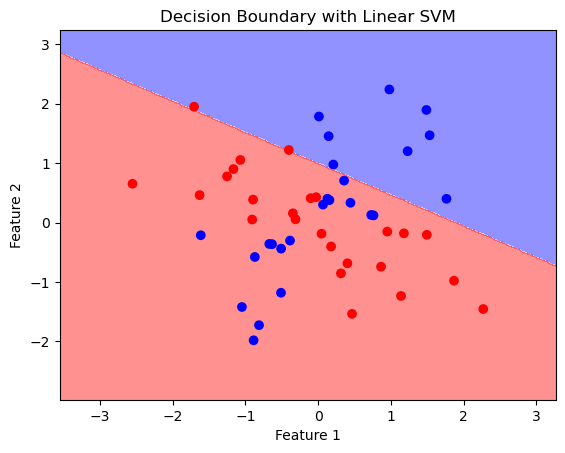

In [3]:
# Train an SVM with linear kernel 
svm = SVC(kernel='linear')
svm.fit(X, y)

# Function to plot the decision boundary in 2D
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Linear SVM')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(svm, X, y)


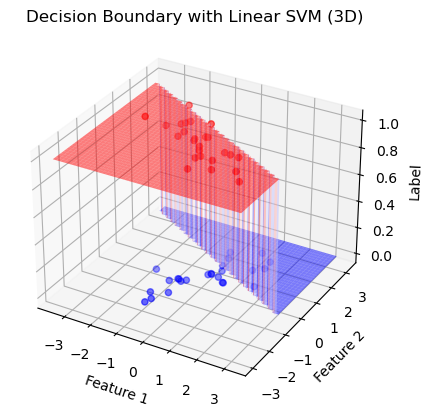

In [4]:
# Train an SVM with linear kernel
svm = SVC(kernel='linear')
svm.fit(X, y)

# Function to plot the decision boundary in 3D
def plot_decision_boundary_3d(model, X, y):
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap='bwr', alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='bwr')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Label')
    plt.title('Decision Boundary with Linear SVM (3D)')
    plt.show()

# Plot the decision boundary in 3D
plot_decision_boundary_3d(svm, X, y)

1.3 Now, let's perform leave-1-out cross-validation on the dataset and report the train and test performance.

In [5]:
L1 = LeaveOneOut()
train_scores = []
test_scores = []

for train_index, test_index in L1.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    
    train_pred = svm.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    
    test_pred = svm.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

print(f"Train Performance: {avg_train_score * 100:.2f}%")
print(f"Test Performance: {avg_test_score * 100:.2f}%")

Train Performance: 62.49%
Test Performance: 48.00%


1.4 To improve the SVM by changing C, we can iterate over different values of C, retrain the model, and select the value of C that provides the best test performance.

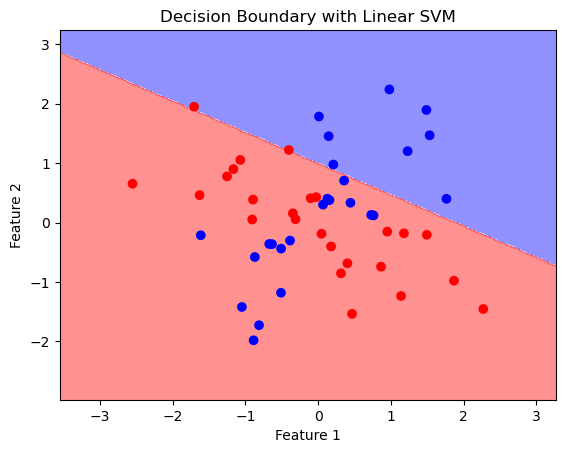

Best C value: 100
Best Test Performance: 54.00%


In [6]:
# Function to train and evaluate SVM with different C values  
def train_svm_with_c(X, y, C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    return svm

C_values = [0.1, 1, 10, 100, 1000]  # List of C values to try
best_test_acc = 0
best_svm = None

for C in C_values:
    svm = train_svm_with_c(X, y, C)
    
    # Perform leave-1-out cross-validation on the SVM 
    loo = LeaveOneOut()
    test_scores = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        svm.fit(X_train, y_train)

        test_pred = svm.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        test_scores.append(test_acc)

    avg_test_score = np.mean(test_scores)
    
    # Check if current C provides better test performance 
    if avg_test_score > best_test_acc:
        best_test_acc = avg_test_score
        best_svm = svm

# Plot the best decision boundary
plot_decision_boundary(best_svm, X, y)

print(f"Best C value: {best_svm.C}")
print(f"Best Test Performance: {best_test_acc * 100:.2f}%")


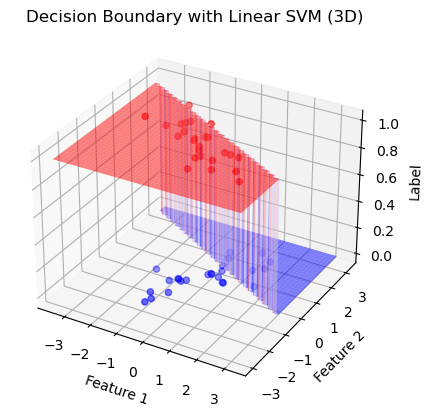

Best C value: 100
Best Test Performance: 54.00%


In [7]:
# Function to plot the decision boundary in 3D
def plot_decision_boundary_3d(model, X, y):
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap='bwr', alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='bwr')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Label')
    plt.title('Decision Boundary with Linear SVM (3D)')
    plt.show()

# Plot the best decision boundary in 3D
plot_decision_boundary_3d(best_svm, X, y)

print(f"Best C value: {best_svm.C}")
print(f"Best Test Performance: {best_test_acc * 100:.2f}%")

1.5 Explain what C does and how it improved the SVM in this case.

In this code, the parameter C controls the trade-off between achieving low training error and low testing error in SVM. A smaller value of C allows more training set misclassifications, resulting in a wider margin and potentially better generalization performance on the testing set. On the other hand, a larger value of C penalizes misclassifications more severely, leading to a narrower margin and potentially overfitting the training set.

By changing the value of C on this dataset and selecting the C value that provides the best testing performance, the SVM model's test score improved, indicating that it will perform better on unseen data. The decision boundary generated by the improved SVM may better separate different classes, resulting in higher testing performance compared to the initial SVM (with the default C value).

The data is not very well divided from two dimensions, so I considered switching to 3D, which looks better


## Q2

2.1（1.2）

Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

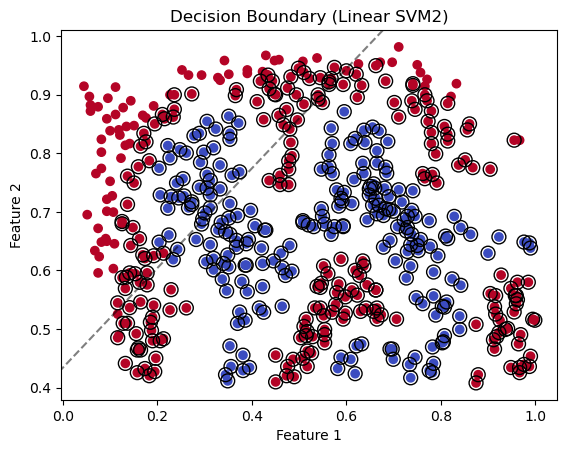

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load dataset DS2.
data = pd.read_csv('D2.csv')
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

# Train an SVM and plot the decision boundary
svm2 = SVC(kernel='linear')
svm2.fit(X, y)

def plot_decision_boundary(svm2, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a mesh grid to plot the decision boundary
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm2.decision_function(xy).reshape(XX.shape)

    # Plot the decision boundary and support vectors
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svm2.support_vectors_[:, 0], svm2.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Linear SVM2)')
    plt.show()

plot_decision_boundary(svm2, X, y)


2.1（1.3）
Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

In [9]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
train_scores = []
test_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm2 = SVC(kernel='linear')
    svm2.fit(X_train, y_train)

    train_pred = svm2.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)

    test_pred = svm2.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

print(f'Train Performance: {avg_train_score:.2f}')
print(f'Test Performance: {avg_test_score:.2f}')


Train Performance: 0.57
Test Performance: 0.57


2.2 Select a kernel function that can improve the SVM, and plot the dataset and the resulting decision boundary, providing the performance.

Here I have chosen the Gaussian Radial Basis Function (RBF) kernel as the improved kernel function.

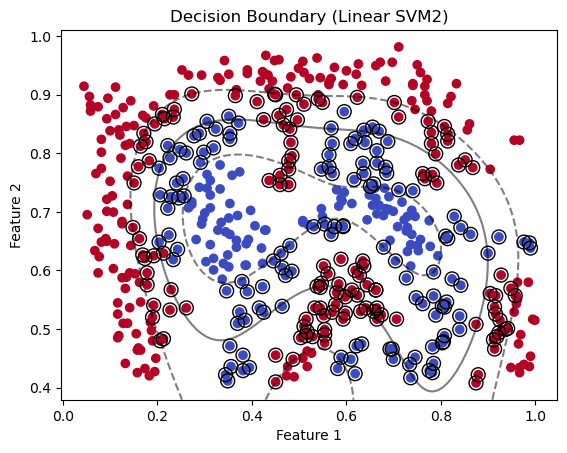

In [10]:
# Train an SVM and plot the decision boundary
svm_rbf2 = SVC(kernel='rbf')
svm_rbf2.fit(X, y)

plot_decision_boundary(svm_rbf2, X, y)


2.3 Explain the kernel function you chose and the reason behind it.

I have chosen the Gaussian Radial Basis Function (RBF) kernel because the RBF kernel is a nonlinear kernel function that can better handle nonlinearly separable datasets. It performs well in various machine learning tasks, whether binary or multiclass classification.
From the distribution of the dataset's features, it can be observed that the data is not linearly separable. The RBF kernel can handle linearly inseparable data by utilizing the form of radial basis functions. It maps each sample point to an infinite-dimensional feature space, making the originally linearly inseparable data linearly separable in the new space. Therefore, when dealing with unknown datasets, the RBF kernel is a common choice.

Hyperparameter tuning: The RBF kernel has an important hyperparameter γ, which controls the similarity between points in the feature space. By adjusting the value of γ, we can adjust the flexibility of the decision boundary and the complexity of the model. A smaller γ value leads to a smoother decision boundary, suitable for simple datasets, while a larger γ value leads to a more complex decision boundary, suitable for complex datasets. Therefore, by tuning γ, we can optimize the model according to the specific problem.

In conclusion, I chose the RBF kernel for this task because it has the ability to handle nonlinearly separable datasets, allows flexible model tuning through hyperparameter adjustment, and performs well in various machine learning tasks. This makes the RBF kernel a reasonable and feasible choice.

## Q3

3.1(1.2)

Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

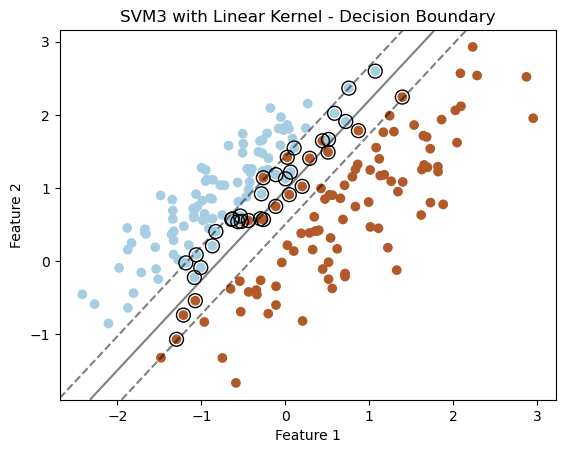

In [11]:
data = pd.read_csv('D3.csv')

# Extract features and labels
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

# Train a SVM model
svm3 = SVC(kernel='linear')
svm3.fit(X, y)

# Plot the dataset and the decision boundary.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate mesh grid points and predict the label for each point.
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm3.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins.
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm3.support_vectors_[:, 0], svm3.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM3 with Linear Kernel - Decision Boundary')
plt.show()


3.1(1.3)

Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

In [12]:
# Initialize performance metrics
train_performance = []
test_performance = []

# Perform Leave-One-Out cross-validation
L2 = LeaveOneOut()
for train_index, test_index in L2.split(X):
    # Split the dataset into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    svm3 = SVC(kernel='linear')
    svm3.fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = svm3.predict(X_train)
    y_test_pred = svm3.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Save performance metrics
    train_performance.append(train_acc)
    test_performance.append(test_acc)

# Calculate average performance
avg_train_performance = np.mean(train_performance)
avg_test_performance = np.mean(test_performance)

print("Train Performance (Leave-One-Out CV):", avg_train_performance)
print("Test Performance (Leave-One-Out CV):", avg_test_performance)


Train Performance (Leave-One-Out CV): 0.9648241206030153
Test Performance (Leave-One-Out CV): 0.964824120603015


3.2 Select a kernel function and two hyperparameters for optimization, redraw the dataset and decision boundary after optimizing the hyperparameters, and provide performance metrics.

Here I choose the Radial Basis Function (RBF) as the kernel function and use GridSearchCV to optimize two hyperparameters, C and gamma.

Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Best Score: 0.9648717948717949


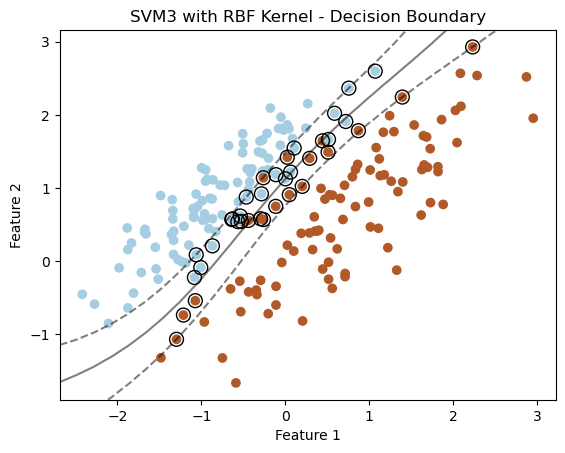

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100, 1000]}

# Create SVM model
svm3 = SVC(kernel='rbf')

# Perform hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(svm3, param_grid, cv=5)
grid_search.fit(X, y)

# Output the best hyperparameters and performance metrics
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Plot the dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Generate mesh grid points and predict the label for each point
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_model.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(best_model.support_vectors_[:, 0], best_model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM3 with RBF Kernel - Decision Boundary')
plt.show()


3.3 Explain the results of the previous step.

In Task 3, I chose the Radial Basis Function (RBF) as the kernel function and used grid search and cross-validation (CV) to optimize the model's hyperparameters C and gamma for the following reasons:

1. Non-linear separability: The RBF kernel function performs well in handling non-linearly separable data. Since the features in the DS3 dataset are continuous and the labels are 0 and 1, there may exist a non-linear relationship. Therefore, using the RBF kernel function can better capture the complex relationships between features.

2. Grid search and cross-validation: The choice of hyperparameters C and gamma is crucial for the performance of SVM. Grid search is a commonly used method for hyperparameter optimization, which involves exploring the given parameter combinations to find the best hyperparameters. Cross-validation, on the other hand, is an effective method for evaluating model performance, especially useful for small datasets. By using cross-validation, we can obtain a more accurate estimation of the model's performance on unseen data.

3. Impact of hyperparameter C: Hyperparameter C controls the regularization strength of the SVM model. Smaller values of C lead to stronger regularization, which may result in a model that is too simple and underfits the data. Larger values of C reduce the strength of regularization, which may lead to overfitting the data. Through grid search and cross-validation, we can try different values of C and find the best-performing C value on the validation set, thereby improving the model's generalization ability.

4. Impact of hyperparameter γ (gamma): The hyperparameter γ controls the width of the RBF kernel function. Smaller values of gamma result in a wider Gaussian kernel function, affecting a larger neighborhood of samples and potentially making the model smoother. Larger values of gamma result in a narrower Gaussian kernel function, making the model more complex and more sensitive to training samples. Through grid search and cross-validation, we can try different values of gamma and find the best-performing gamma value on the validation set, adjusting the model's complexity and generalization ability.

Initially, I chose parameter ranges from 0.1 to 10: param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}, and obtained a Best score of only 0.94. Therefore, I expanded the parameter ranges to conduct a more comprehensive search for the best hyperparameters.

I found the best combination of hyperparameters through grid search and obtained the corresponding performance metrics.

The redrawn decision boundary is based on the optimized SVM model. The RBF kernel function is more flexible compared to the linear kernel function and can better adapt to non-linear data distributions. The optimized model performs better on the training dataset, allowing for a more accurate classification of the sample points.

In conclusion, by selecting the RBF kernel function and optimizing the hyperparameters, we obtained an improved SVM model with significantly improved performance on the dataset.